In [15]:
# need a training dataset of simulated X_i = (T_i,Cv_i) data and the corresponding spectrum vectors s_j

import numpy as np
from matplotlib import pyplot as plt

# range for output spectra
wmax = 120

# range for Debye spectra
wDmin = 10
wDmax = 40

# range for width of optical modes
sigbar = 10

In [2]:
# makeT produces a vector of sorted, log-uniform distributed temperatures in the range [Tmin,Tmax]

def makeT(m, Tmin, Tmax):
    logTmax = np.log(Tmax)
    logTmin = np.log(Tmin)
    return np.sort(np.exp(np.random.uniform(logTmin, logTmax, m)))


In [3]:
# here I work on modelling the density of states

# makeW returns a vector of n omega (energy) values, up to wmax
def makeW(n, wmax):
    return (np.linspace(0, wmax, n),wmax/(n-1.))

# debyeMode is normalized to 1, and takes the Debye frequency as a parameter
# logical test implements the cutoff for w > wD
def debyeSpectrum(w,wD):
    return (w<=wD)*3*w*w/(wD*wD*wD)

# opticalMode is also normalized to 1
# models an optical phonon mode as a higher frequency Gaussian with mean mu and width sig
def opticalMode(w, wbar, sig):
    return np.exp(-0.5*(w-wbar)*(w-wbar)/(sig*sig))/np.sqrt(2*np.pi*sig*sig)

# genSpectrum produces a Debye spectrum plus a random number of optical modes
def genSpectrum(w):
    # acoustic modes
    s = np.zeros(len(w)) # initialize spectrum
    wD = np.random.uniform(wDmin, wDmax) # randomly draw Debye frequency from uniform distribution
    s += debyeSpectrum(w, wD) # update spectrum vector
    # optical modes
    n = np.random.randint(0,5) # number of optical modes
    if n==0: # no need to proceed
        return debyeSpectrum(w,wD)
    wbar = np.random.uniform(wD, 0.75*max(w), n) # generate n positions for optical modes in range [wD, 0.5wmax]
    sig = np.random.normal(sigbar, sigbar/3, n) # generate n widths for optical modes 
    for i in range(n):
        s += opticalMode(w, wbar[i], sig[i])
    return s/(n+1.)
    

1.0019000441055956


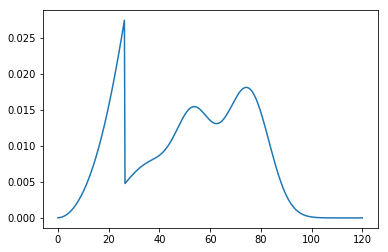

In [17]:
(w,dw) = makeW(500,wmax)
dos = genSpectrum(w)
# check normalization, should be ~1 (very poor integration approximation)
print np.sum(dos*dw)
# plot
plt.plot(w,dos)